# Two Fluid Quantum Cosmological Model: Evolution of the Modes $\left\{\zeta_{k},S_{k},\Pi_{\zeta k}, \Pi_{Sk} \right\}$

## Key Cells

In [1]:
# Basic Libraries
f1 = 1
import sys                                                        # imports the usual sys library
import math                                                       # imports the usual math library
import numpy as np                                                # imports the Numpy Library
from tqdm import tqdm                                             # imports the tqdm library
from scipy.integrate import quad                                  # imports the integration command quad from the scipy library
import matplotlib as mpl                                          # imports the full Matplotlib Library
import matplotlib.pyplot as plt                                   # imports the pyplot module from Matplotlib Library
import matplotlib.colors as colors                                # impors the colors module from Matplotlib Library
import matplotlib.cm as cmx                                       # imports the cmx module from Matplotlib Library
#mpl.rcParams['text.usetex'] = True                                # enables the use of TeX on graphs
#plt.rc('text.latex', preamble=r'\usepackage{amssymb}')            # sets the preamble for TeX


# Importing the NumCosmo Library
from numcosmo_py import Nc, Ncm                                   # imports the NumCosmo library
from numcosmo_py.plotting.tools import set_rc_params_article      # imports Numcosmo plotting tools

# Imports useful commands for the 2fluid model
import two_fluid_key as tf                                        # imports the two_fluid_key.py file, where the relevant quantities are defined

# definition of the model

twofluid = Nc.HICosmoQGRW()                                  # defines a cosmological model, which is represented by a NumCosmo object. Then, the relevant cosmological parameters are added to this object

# these lines set the relevant cosmological parameters
k = 1.0         # sets a fiducial value of k
Ωr = 1.0e-5     # abundance of radiation
w = 1.0e-5      # equation of state parameter of dark matter
xb = 1e30       # inverse of scale factor at the bounce, xb = 1/ab

# this lines set the attributes of the cosmological model
twofluid.props.w = w                                         # dust/dark matter equation of state parameter
twofluid.props.Omegar = Ωr                                   # radiation abundance today
twofluid.props.Omegaw = 1.0 * ( 1.0 - Ωr )                   # dust/dark matter abundance today
twofluid.props.xb = xb                                       # inverse scale factor xb=1/ab at the time of the bounce

# evolution of the model
#twofluid_c = tf.model_evol(twofluid,alpha_c,k)               # evolves the equations of motion for during the contraction phase using the twofluid_key.py commands

# precision parameters
p1 = 1.0e-4
p2 = 0.0

k_RH = 2
zeta1 = tf.mode_1(k_RH,twofluid, p1, p2, -250 )
zeta1.t[0]

-76.90159880067766


np.float64(-73.5807878541883)

## Introduction

In this notebook we shall analyze the evolution of the adiabatic and entropy modes $\zeta_{k}, S_{k}$ associated to cosmological perturbations of the two fluid quantum cosmological model. Reference $\tt \text{arXiv:1510.06628}$ analyzes the cosmological perturbations formalism for $N$ fluid models. In the 2 fluid case, the obtained perturbative Hamiltonian in Fourier space is given explicitly by

\begin{align}
    \delta {\cal H}^{(2,s)}_{k} & = \frac{1}{2m_{z}}\Pi_{\zeta k}^{2} + \frac{1}{2m_{S}}\Pi_{Sk}^{2} + \left({ \frac{ \bar{c}_{n} }{ \bar{c}_{S}\bar{c}_{m} } }^{2}\frac{1}{m_{\zeta}m_{S}}\frac{1}{NH}\right)\Pi_{\zeta k}\Pi_{Sk} \\
    %
    & \, \, + \frac{1}{2}m_{z}\nu_{\zeta_{k}}^{2} \zeta^{2} + \frac{1}{2}m_{S}\nu_{S}^{2}S_{k}^{2} \, ,
\end{align}

where $\zeta_{k}$ and $Q_{k}$ denote adiabatic and entropy perturbation modes, with $\Pi_{\zeta k}, \Pi_{S k}$ being their associated momenta. We also introduced

\begin{align*}
    m_{\zeta}  \equiv \frac{ a^{3}({ \bar{\rho} + \bar{p} }) }{N\bar{c}_{S}^{2}\bar{H}^{2} }\, , \hspace{2.4cm} & \hspace{-0.1cm} m_{S}  \equiv \frac{ 1 }{  N a^{3}\bar{c}_{m}^2\bar{\omega} } \, ,  \\
    %
    \nu_{\zeta}^{2} \equiv \bar{c}_{S}^{2}F^{2}_{k} \, , \hspace{3.15cm} & \hspace{0.05cm} \nu_{S}^{2} \equiv {c}_{m}^{2}F^{2}_{k} \, ,  \\
    %
    \bar{c}_{S}^{2} \equiv \bar{c}_{1}^{2}\cos^{2}\phi+\bar{c}_{2}^{2}\sin^{2}\phi \, , \hspace{1cm} & \bar{c}_{m}^{2} \equiv \bar{c}_{2}^{2}\cos^{2}\phi+\bar{c}_{1}^{2}\sin^{2}\phi
    \, .
\end{align*}

where $\bar{\omega} \equiv (\rho_1 + p_1)(\rho_2 + p_2)/(\rho + p)$ and $\bar{c}_{n}^{2} \equiv \bar{c}_{1}^{2} - \bar{c}_{2}^{2}$. Here, for later convenience, we have also introduced the angular variable $\phi$ and the functions $F_{k}(t)$ by

\begin{equation}
 \cos^{2}\phi \equiv \frac{ \rho_1 + p_1 }{ \rho + p }\, ,
\end{equation}

\begin{equation}
 \sin^{2}\phi \equiv \frac{ \rho_2 + p_2 }{ \rho + p }\, ,
\end{equation}

\begin{equation}
 \hspace{0.8cm} F^{2}_{k} \equiv \left({\frac{ Nk }{ a }}\right)^{2}\, .
\end{equation}

The angular variable $\phi$ is associated to the dominant fluid, with $\phi=0$ denoting domination by the fluid $1$ and $\phi=\pi/2$ denoting domination by the fluid $2$.

The obtained Hamiltonian for the adiabatic and entropy modes leads to the equations of motion

\begin{align}
  \ddot{\zeta} + R^{-1}_{H,\zeta}\dot{\zeta} + \nu^{2}_{\zeta}\zeta & = -\aleph_{\zeta S}Q + \beth_{\zeta S}\dot{Q} \, , \\
  \ddot{Q} + R^{-1}_{H,S}\dot{Q} + \nu^{2}_{S}Q & = -\aleph_{S\zeta}\zeta + \beth_{S\zeta}\dot{\zeta} \, , \\
\end{align}

where we introduced the effective Hubble radius for the adiabatic and entropy modes

\begin{align}
 R^{-1}_{H,\zeta} & \equiv \left( \frac{ \dot{m}_{\zeta} }{ m_{\zeta} } + Ym_{S}m_{\zeta}\dot{Y} \right)\varrho \, , \\
 R^{-1}_{H,S} & \equiv \left( \frac{ \dot{m}_{S} }{ m_{S} } + Ym_{S}m_{\zeta}\dot{Y} \right)\varrho \, ,
\end{align}

and the couplings

\begin{align}
 \aleph_{\zeta S} & \equiv Ym_{S}\nu^{2}_{S}\, , \, \,  & \, \, \beth_{\zeta S} \equiv \frac{ m_{s} }{ m_{\zeta} }\left( m_{\zeta}\dot{Y} + \dot{m}_{\zeta}Y \right)\varrho  \, , \\
 \aleph_{S\zeta} & \equiv Ym_{\zeta}\nu^2_{\zeta}\, , \, \,  & \, \, \beth_{S\zeta} \equiv \frac{ m_{\zeta} }{ m_{s} }\left( m_{s}\dot{Y} + \dot{m}_{s}Y \right)\varrho  \, .
\end{align}

where $\varrho \equiv (1-Y^{2}m_{S}m_{\zeta})^{-1} $. It is also relevant to point out the dependence of such terms with respect to the mode index $k$. Since $\nu_{\ell}^{2} \sim k^{2}, m_{\ell} \sim k^{0}, Y \sim k^{0}$, we have the following spectral behavior

\begin{align}
  R^{-1}_{H\ell} & \sim k^{0}\, , \\
  \aleph_{\ell\ell^{\prime}} & \sim k^{2}\, , \\
  \beth_{\ell\ell^{\prime}} & \sim k^{0}\, ,
\end{align}

where $\ell = \zeta, Q$ is just a label. This implies that, for large $k$, only the frequency term $\nu^{2}_{\ell}$ and the coordinate-coordinate coupling $\aleph_{\ell}$ are relevant.

In usual cosmological perturbation models, the perturbations are decoupled, which is recovered by setting $Y \rightarrow 0$, so that the equations have a similar form but with $\aleph_{ij} = \beth_{ij} = 0$. One then analyzes two different regimes:

\begin{align}
  \text{ i) Sub-Hubble :} & |R^{-1}_{H, \ell}| \ll \nu_{\ell} \implies \text{oscillatory behavior} \, , \\
  \text{ ii) Super-Hubble :}  & |R^{-1}_{H, \ell}| \gg \nu_{\ell} \implies \text{"frozen" behavior} \, .
\end{align}

Also, since $R_{H\ell} \sim k^{0}, \nu^{2}_{\ell} \sim k^{2}$, for modes with large enough $k$, they will remain sub-Hubble for most of their evolution, that is

\begin{align}
  \text{ i) UV limit} \, \, k \ll k_{\text{crit}} \iff \text{Sub-Hubble} \, \, &  \implies \text{oscillatory behavior} \, , \\
  \text{ ii) IR limit} \, \, k \gg k_{\text{crit}} \iff \text{Super-Hubble}  \, \, & \implies \text{"frozen" behavior} \, ,
\end{align}

where we emphasize that this holds only for an interval of the modes time evolution.

In this model, however, the couplings $\aleph_{\ell}, \beth_{\ell}$ are also relevant, and will lead to non-trival effects apart from the usual oscillatory/frozen behavior. In particular, **even in the deep UV limit $k \gg k_{\text{crit}}$, the modes will still be coupled by the $\aleph_{\ell}$ term**, namely:

\begin{align}
  \ddot{\zeta} + \nu^{2}_{\zeta}\zeta & = -\aleph_{\zeta S}Q \, , \\
  \ddot{Q} + \nu^{2}_{S}Q & = -\aleph_{S\zeta}\zeta  \, . \\
\end{align}

One can also show that, since $\aleph_{ij} \propto \nu_{j}$ and $\nu_{j}$ is large in the past assuming that modes started in a vacuum like state, we have that $\aleph_{ij}$ is also large in the past. Therefore, the modes are coupled even in the sub-Hubble/UV limit. This sub-Hubble behavior means that the WKB approximation does not hold and one cannot impose the usual adiabatic vacuum initial conditions.

While at classical level the equations of motion could be solved by numerical methods, at quantum level this demands the use of special quantization techniques to define the associated vacuum state and extract predictions, as proposed by $\tt \text{arXiv:1510.06628}$ using the Hamiltonian Diagonalization Technique.

The technique amounts to define new canonical variables $\left\{ Q{1}, Q^{2}, P^{1}, P^{2} \right\}$ to diagonalize the perturbative Hamiltonian. Since the obtained canonical transformation is time dependent, the Hamiltonian can only be diagonalized for an initial time instant. However, the coupling between the variables is improved and enables one to define a reasonable vacuum state. For more details, see $\tt \text{arXiv:1510.06628}$.

Therefore, in this notebook, we analyze the evolution of the modes $\{\zeta_{k1}, \zeta_{k2}, S_{k1}, S_{k2}\}$ using the initial conditions obtained using the above technique. Using the evolved modes, one may also calculate the adiabatic and entropy power spectra and other correlation functions, which are available on the $\tt \text{2fluid_adiabatic.ipynb}$ and $\tt \text{2fluid_corr.ipynb}$ files, respectively.

## Defining the Model

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In this section we briefly define our cosmological model and explicit our choice of parameters. Note that at this point we shall only use fiducial values for the parameters, with their best fit values being determined later using CMB data.

We start by defining a time variable to evolve our cosmological model and modes. Since in bouncing models one sets the vacuum initial conditions in the far past where the scale factor $a$ is very large with respect to the scale factor at the bounce $a_{\text{B}}$, $|a| \gg a_{B}$, one sees that the model needs to consider different scales for $a$. Due to this fact, we shall use a logarithmic time variable $\alpha$ defined by

$$ \alpha(a) = \ln\left(\frac{ a_{ \text{B} } }{ a }\right) \, . $$

Numerical integration shall then be performed using $\alpha$, and then converted to $a$, which is achieved by using

$$ a(\alpha) = a_{ \text{B} }e^{-\alpha}\, . $$

We shall now implement the interval $\alpha \in (-120,10)$, so that the evolution starts in the far past and ends right after the bounce.

In [3]:
# important times
min_alpha_c = -125.0                                            # defines the initial value of the time variable alpha (α) during the contraction phase
max_alpha_c = 120                                                # defines the final value for α
min_alpha_scale = 1.0e-12                                       # defines the minimum scale e.g. the minimum step of α
np_plot = 100                                                  # plotting variable of the Numpy library

# Time arrays for the contraction phase
alpha_c = np.linspace(min_alpha_c, max_alpha_c, np_plot)        # defines the α interval for the contraction phase

We shall now define a $\tt {\text{NumCosmo}}$ cosmological model object using the $\tt {\text{HICosmoQGRW} }$ method. The cosmological model is then defined by the set of parameters

\begin{align}
  \Omega_{r} & : \text{abundace of radiation} \, , \\
  \Omega_{m} & : \text{abundace of dark matter} \, , \\
  w & : \text{equation of state parameter of dark matter} \, , \\
  a_{\text{B}} & : \text{scale factor at the bounce instant} \, . \\
\end{align}

Note that, while the $\Omega_{r}, \Omega_{m}, w$ parameters are also free parameters of the $\Lambda$-CDM model, the only introduced free parameter is given by the scale factor at the bounce $a_{\text{B}}$, which must be fixed by observations. This also shows that this model is simple with respect to Occam's razor, and that it has less free parameters than usual inflationary models.

In [4]:
# definition of the model

twofluid = Nc.HICosmoQGRW()                                  # defines a cosmological model, which is represented by a NumCosmo object. Then, the relevant cosmological parameters are added to this object

# these lines set the relevant cosmological parameters
k = 1.0         # sets a fiducial value of k
Ωr = 1.0e-5     # abundance of radiation
w = 1.0e-5      # equation of state parameter of dark matter
xb = 1e30       # inverse of scale factor at the bounce, xb = 1/ab

# this lines set the attributes of the cosmological model
twofluid.props.w = w                                         # dust/dark matter equation of state parameter
twofluid.props.Omegar = Ωr                                   # radiation abundance today
twofluid.props.Omegaw = 1.0 * ( 1.0 - Ωr )                   # dust/dark matter abundance today
twofluid.props.xb = xb                                       # inverse scale factor xb=1/ab at the time of the bounce

# evolution of the model
twofluid_c = tf.model_evol(twofluid,alpha_c,k)               # evolves the equations of motion for during the contraction phase using the twofluid_key.py commands

In [5]:
# scale factor a(α)
def a(α, aB = 1.0e-30):
  return aB * np.exp(np.abs(α))                                # defines the scale factor a(α) as a function of logarithmic time α

# scale factor at the bounce
aB = 1 / twofluid.xb()

# scale factor interval for contraction phase
a_c = a(alpha_c) / aB

In [6]:
%%time

# special time instants
tz = twofluid_c.tz            # defines the time instant αζ such that ϕ = ϕζ
ts = twofluid_c.ts            # defines the time instant αS such that ϕ = ϕS
tc = twofluid_c.tc            # defines the time instant αc such that ϕ = π/4

# special scale factor values
az = a(tz)                    # defines the scale factor aζ such that ϕ = ϕζ
aS = a(ts)                    # defines the scale factor aζ such that ϕ = ϕS
ac = a(tc)                    # defines the scale factor aζ such that ϕ = π/4

# critical values of k
k_range = np.geomspace(1e-10, 1e14, 10**2)      # sets an interval of k to calculate the special k values
kzz = twofluid_c.kz1()                          # calculates kζζ
kzS = twofluid_c.kz2()                          # calculates kζS
kSz = twofluid_c.ks1(k_range)                   # calculates kSζ
kSS = twofluid_c.ks2(k_range)                   # calculates kSS
kc = twofluid_c.kcrit(np.geomspace(1e3,1e14,100))                         # calculates the critical value kc. Note that we have not calculated one kc for the adiabatic mode and other for the entropy one. This is due to the fact that, according to the background analysis present on 2fluid_background.ipynb, their crossing times coincide at the critical time instant

# prints the results

# prints the special alpha valueshttps://meet.google.com/uvn-yvhp-obm
print('αζ = ' + format(tz, '.2f'))              # prints αζ
print('αS = ' + format(ts, '.2f'))              # prints αS
print('αc = ' + format(tc, '.2f'))              # prints αc

print('-------------')  

# prints the special scale factor values
print('aζ = ' + format(az, '.2e'))              # prints αζ
print('aS = ' + format(aS,  '.2e'))              # prints αS
print('ac = ' + format(ac,  '.2e'))              # prints αc

print('-------------')

# prints the special k values
print('kζζ = ' + f"{kzz:.2e}")                  # prints kζζ
print('kζS = ' + f"{kzS:.2e}")                  # prints kζS
print('kSζ = ' + f"{kSz:.2e}")                  # prints kSζ
print('kSS = ' + f"{kSS:.2e}")                  # prints kSS
print('kc = ' + f"{kc:.2e}")                    # prints kc

αζ = -68.08
αS = 48.23
αc = 58.13
-------------
aζ = 3.69e-01
aS = 8.85e-10
ac = 1.76e-05
-------------
kζζ = 9.68e+02
kζS = 2.19e+07
kSζ = 1.52e+00
kSS = 1.87e+13


/sps/lsst/users/ebarroso/pbh_calculation/two_fluid_key.py:279: RuntimeWarning: invalid value encountered in log
  dif_c = np.abs( np.log( np.array( self.cross_Z(k_interval) ) / np.array( self.cross_S(k_interval) ) ) )


TypeError: unsupported format string passed to NoneType.__format__

In [7]:
%%time
# list of k values
#k_list = [1e-8, 1e-4, 1e-2, 1, kSz, 1e2, kzz ,kc, 5 * kc]  # defines a different list of k's
#k_paper = [kzz / 1000, kmean, kc * 1000]                    # sets a list of values to be used in the 2fluid paper
k_list = [1,10,100]                                            # sets the k_list to be equal the k_paper list
#k_list = [1,kc]                                            # defines a testing list. Uncomment this line to make the code go faster
k_list = [1]

# precision parameters
p1 = 1.0e-4
p2 = 0.0

# Generates the Modes & Models
#mode1_list = [tf.mode_1(k,twofluid, p1, p2, max_alpha_c ) for k in k_list]  # generates a list with each mode associated to the Initial Condition 1 for our cosmological model
#mode2_list = [tf.mode_2(k,twofluid, p1, p2, max_alpha_c) for k in k_list]  # generates a list with each mode associated to the Initial Condition 2 for our cosmological model
model_list = [tf.model_evol(twofluid, alpha_c, k) for k in k_list]  # generates a list of evolved models for each k

CPU times: user 4.64 ms, sys: 1.95 ms, total: 6.58 ms
Wall time: 5.68 ms


In [8]:
import scipy.constants as ct
s = twofluid.RH_Mpc()                             # converts from Hubble radius to Mpc⁻¹ using the implemented Rh_Mpc NumCosmo method
Pl = ct.physical_constants['Planck length'][0]
p = ct.parsec
ly = ct.light_year
#f = ( Pl / (p*s * (10*6)) )*2
f1 = ( Pl / (p*s * (10**6)) )
f2 = ( Pl * (p*s * (10**6)) )


In [9]:
def spec_params(Omegars, w, xb,  E0, k_interval, tf = -1):
    cosmo = Nc.HICosmoQGRW()
    cosmo.props.w = w
    cosmo.props.Omegar = E0 * Omegars
    cosmo.props.Omegaw = E0 * (1.0 - Omegars)
    cosmo.props.xb = xb

    pert = Nc.HIPertTwoFluids.new()
    pert.props.reltol = 1.0e-9

    k0 = k_interval[0]
    kf = k_interval[-1]
    L = len(k_interval)

    spec1 = pert.compute_zeta_spectrum(cosmo, 1, -cosmo.abs_alpha(1.0e-14), tf, k0, kf, L)
    spec2 = pert.compute_zeta_spectrum(cosmo, 2, -cosmo.abs_alpha(1.0e-14), tf, k0, kf, L)
    return spec1, spec2

def spec(cosmo, k_interval, E0 = 1, tf = -1):
  w = cosmo.props.w
  Omegars = cosmo.props.Omegar
  Omegarm  = E0 - cosmo.props.Omegaw
  xb = cosmo.props.xb
  spec1, spec2 = spec_params(Omegars, w, xb,  E0, k_interval, tf)
  print(np.array(spec1.peek_yv().dup_array()))
  Pk_a1 = np.exp( np.array(spec1.peek_yv().dup_array()) )
  Pk_a2 = np.exp( np.array(spec2.peek_yv().dup_array()) )

  return ((f1**2)/ (2 * (np.pi**2)) ) * ( Pk_a1 + Pk_a2 )

In [10]:
def compute_kj(a_eta, Omega_m, Omega_r, w):
    sqrt_arg = (36 * a_eta**2 * Omega_m**2 + 12 * (-1 + 48*w) * a_eta * Omega_m * Omega_r + (1 + 48*w)**2 * Omega_r**2)
    return np.sqrt((6 * a_eta * Omega_m + (-1 + 48*w) * Omega_r + np.sqrt(sqrt_arg)) / (8 * w * a_eta**2))

def compute_jeans_a(k, a_eta_list, Omega_m, Omega_r, w):
  dif_list = np.abs(k - compute_kj(a_eta_list,Omega_m, Omega_r,w) )
  index  = None
  for j in range(len(dif_list)):
    if dif_list[j] == np.min( dif_list ):
      index = j
  return a_eta_list[index]

def alpha_calc(a, aB = 1e-30):
  return np.log(aB/a)

In [11]:
a_c

array([1.93557604e+54, 1.62945010e+53, 1.37174029e+52, 1.15478922e+51,
       9.72150600e+49, 8.18397654e+48, 6.88961896e+47, 5.79997379e+46,
       4.88266422e+45, 4.11043407e+44, 3.46033794e+43, 2.91305941e+42,
       2.45233711e+41, 2.06448151e+40, 1.73796819e+39, 1.46309542e+38,
       1.23169585e+37, 1.03689387e+36, 8.72901289e+34, 7.34845371e+33,
       6.18624036e+32, 5.20783982e+31, 4.38418070e+30, 3.69078947e+29,
       3.10706330e+28, 2.61565782e+27, 2.20197182e+26, 1.85371337e+25,
       1.56053463e+24, 1.31372432e+23, 1.10594891e+22, 9.31034756e+20,
       7.83784592e+19, 6.59823151e+18, 5.55467146e+17, 4.67615830e+16,
       3.93658861e+15, 3.31398745e+14, 2.78985536e+13, 2.34861870e+12,
       1.97716695e+11, 1.66446309e+10, 1.40121571e+09, 1.17960288e+08,
       9.93039795e+06, 8.35983066e+05, 7.03766043e+04, 5.92460138e+03,
       4.98758102e+02, 4.19875748e+01, 3.53469234e+00, 3.36060565e+00,
       3.99196501e+01, 4.74193830e+02, 5.63280959e+03, 6.69104951e+04,
      

## Compute Beta Function

In [12]:
# %%time
# Pz = spec(twofluid, k_range, tf = alpha_calc(aJk)  )

# #Pz = spec(twofluid, k_range, tf = alpha_calc(a_trans)  )

In [13]:
# plt.plot( k_range, Pz )
# plt.axvline(kJ, color='black', linestyle='--')
# plt.axvline(kzz, color='purple', linestyle='--')
# #plt.axhline(PzJ, color='red')
# plt.xscale('log')
# plt.yscale('log')

In [14]:
# for j in range(len(k_range)):
#   if np.abs(k_range[j]-kJ) == np.min(np.abs(k_range-
kJ)):
#     PzJ = Pz[j]
# print(PzJ)

In [15]:
import scipy as sc
RH= Ncm.C.c() / (1.0e5 * 0.674)
conv_to_solar_mass = 2.7754 * 10**11 * (0.674)**2 * RH*3

k_interval_beta = np.geomspace(1e-8,1e5, 100)

Omegaw = twofluid.props.Omegaw
Omegars = twofluid.props.Omegar
RH_meter = RH * 3.086e22
print(RH, RH_meter)


4447.959317507419 1.3726402453827896e+26


In [16]:
from scipy.special import j1
from scipy.integrate import quad
from scipy.special import erfc


def mass_rj(a, Omegaw, Omegars, w, ac=1.30418e23):
    x = ac/a
    t1 = 8 * np.pi**3 * np.sqrt(2) * w**(3/2)
    t2 = Omegaw * x**3 + Omegars* x**4
    t3 = 6 * Omegaw * x**3 - (1-48*w)*Omegars * x**4
    t4 = t3**2 + 192*w*Omegars**2 * x**8
    denom = (t3 + np.sqrt(t4))**(3/2)
    result = 1.0e23 * t1 * t2 / denom
    return result
    
def compute_RJ_kj(a_over_ac, Omega_wc, Omega_rc, w, Hc):
    term1 = 6 * Omega_wc * (1.0/a_over_ac)**3
    term2 = (1 - 48 * w) * Omega_rc * (1.0/a_over_ac)**4
    term3 = 192 * w * (Omega_rc**2) * (1.0/a_over_ac)**8
    discriminant = (term1 - term2)**2 + term3
    sqrt_discriminant = np.sqrt(discriminant)
    
    denominator = term1 - term2 + sqrt_discriminant
    print(denominator)
    sqrt_w_denominator = np.sqrt(2 * w / denominator)
    a = a_over_ac * 1.30418e23
    RJ = (4*np.pi / (a * Hc)) * sqrt_w_denominator
    kj = 2 * np.pi / (a * RJ)
    return RJ, kj

def compute_beta_k(k_interval, zeta_c, omegar, w):
  beta_list = []
  k_interval = np.atleast_1d(k_interval)
  for k in k_interval:
    a_interval = np.logspace(-5, 12, int(1e4))
    aJk = compute_jeans_a(k, a_interval, Omega_m = 1 - v, Omega_r = omegar, w=w)
    kJ = k
    n = 6
    kJ_int = np.array([10**(j/10) * kJ for j in range(n)])
    Pz = spec(twofluid, kJ_int, tf = alpha_calc(aJk)  )
    PzJ = Pz[0]
    #print(PzJ, kJ, aJk)
    def gauss_pzK(z):
      return (2/(np.sqrt( 2 * np.pi * PzJ ))) * np.exp(  -z**2 / (2*PzJ) )

    beta_list.append( sc.integrate.quad(gauss_pzK, zeta_c, np.inf)[0] )

  return beta_list

def compute_beta_k_xuan(k_interval, zeta_c, omegar, w, w_n, aform):
  beta_list = []
  arg_list = []
  #A_0_list = []
  PZ_list = []
  beta_list2 = []
  k_interval = np.atleast_1d(k_interval)
  zeta_c = np.atleast_1d(zeta_c)
  aform = np.atleast_1d(aform)
  twofluid.props.w = w
  for l,k in enumerate(k_interval):
    kJ = k   # your known value
    n = 6

    # Step 1: Generate 5 log-spaced points (excluding kJ)
    log_left = 1.0e-15
    log_right = kJ
    kJ_int = np.geomspace(log_left, log_right, n)
    print(kJ_int)
    #kJ_int = np.array([10**(j/10) * kJ for j in range(n)])
    Pz = spec(twofluid, kJ_int, tf = alpha_calc(aform[l])  )
    PzJ_list = Pz / Pz[-1]
    PzJ_i = PzJ_list * 1.5e-124 * (1.0 - omegar) / omegar  * twofluid.props.xb**2 / w_n**(5/2)
      
    def gauss_pzK(z):
      return (2/(np.sqrt( 2 * np.pi * PzJ_i[-1]))) * np.exp(  -z**2 / (2*PzJ_i[-1]) )

    beta_list.append( sc.integrate.quad(gauss_pzK, zeta_c[l], np.inf, epsabs=1e-14, epsrel=1e-14, limit=200)[0] )
    arg_list.append(zeta_c[l] / np.sqrt(2 * PzJ_i[-1] ))
    beta_i = erfc(zeta_c[l] / np.sqrt(2 * PzJ_i[-1] ))
    beta_list2.append(beta_i)
    #A_0_list.append(A_0_T)
    PZ_list.append(PzJ_i[-1])
  return beta_list, PZ_list, arg_list, beta_list2

### Computing from Xuan table

#### Values from overleaf

In [17]:
w_table = 1.75e-24
omega_r_table = 1.26e-7
omega_m_table = 1.0 - omega_r_table
ac_table = 1.30418e23
k_interval_table = np.array([1.260e-4, 1.237e-20, 1.244e-31]) * RH_meter
zetac_table = [2.879e-24, 2.879e-24, 2.878e-24]
x_table = [2.970e-2, 1.379e9, 2.970e16]
aform_table = np.array(x_table) * ac_table

##### Find a for mass

In [18]:
# Known mass values
from scipy.optimize import root_scalar
mass_values = [1e-14, 1e2, 1e13]  # example masses

a_grid = np.logspace(17, 50, 10000)
mass_grid = mass_rj(a_grid, omega_m_table, omega_r_table, w_table)

a_solutions = []

for M in mass_values:
    found = False
    for i in range(len(a_grid) - 1):
        f1 = mass_grid[i] - M
        f2 = mass_grid[i+1] - M
        if f1 * f2 < 0:  # sign change detected
            a_low = a_grid[i]
            a_high = a_grid[i+1]
            sol = root_scalar(
                lambda a: mass_rj(a, omega_m_table, omega_r_table, w_table) - M,
                bracket=[a_low, a_high],
                method='brentq'
            )
            if sol.converged:
                a_solutions.append(sol.root)
            else:
                a_solutions.append(None)
            found = True
            break
    if not found:
        a_solutions.append(None)

# Print results
for M, a_val in zip(mass_values, a_solutions):
    print(f"Mass = {M:.2e}, a = {a_val:.5e}" if a_val else f"Mass = {M:.2e}, no solution found")
    print(f"Mass = {M:.2e}, a / ac = {a_val/(ac_table):.5e}" if a_val else f"Mass = {M:.2e}, no solution found")
    print(f"The alpha is {alpha_calc(a_val)}")

Mass = 1.00e-14, a = 3.87355e+21
Mass = 1.00e-14, a / ac = 2.97011e-02
The alpha is -118.78601178243464
Mass = 1.00e+02, a = 1.79795e+32
Mass = 1.00e+02, a / ac = 1.37861e+09
The alpha is -143.34692297626017
Mass = 1.00e+13, a = 3.87357e+39
Mass = 1.00e+13, a / ac = 2.97012e+16
The alpha is -160.23254699154987


##### Find k for 

In [19]:
k_values = []
hc = 2.16e-18
print(a_solutions)
for i,a_val in enumerate(a_solutions):
    print(a_val)
    x = a_val / ac_table
    print(x)
    #kJ2 = compute_kj(a_val, Omega_r=omega_r_table, Omega_m=1-omega_r_table, w=w_table)
    RJ, kJ = compute_RJ_kj(x, 1-omega_r_table, omega_r_table, w_table, hc)
    k_values.append(kJ)
    print(f'K in (meters)-1 {kJ}')
    print(f'Radius in meters {RJ}')

[3.8735524810454645e+21, 1.797950150385761e+32, 3.8735661749391265e+39]
3.8735524810454645e+21
0.02970105722404472
457999.66325990355
K in (meters)-1 0.0003906810197687226
Radius in meters 4.151911725155565e-18
1.797950150385761e+32
1378605829.2457798
4.5799512971712415e-27
K in (meters)-1 3.9067908617177786e-20
Radius in meters 8.945035299685692e-13
3.8735661749391265e+39
2.97011622240728e+16
4.57995129717124e-49
K in (meters)-1 3.9067908617177763e-31
Radius in meters 4.151917596329326e-09


In [20]:
#The values of k in meters^-1 is natural units, then convert to Mpc^-1 and then to Hubble units
k_values_hubble = np.array(k_values) / Ncm.C.c()* 3.08567758e22 * 4500
print(k_values_hubble)

[1.80952534e+14 1.80951638e-02 1.80951638e-13]


In [21]:
k_check = np.geomspace(1.0e-8, 1e6, 100)
Pz_check = spec(twofluid, k_check , tf = -1  )
k_edlist = []

[108.9549468  109.60618299 110.25741917 110.90865536 111.55989153
 112.2111277  112.86236388 113.51360004 114.1648362  114.81607234
 115.46730846 116.11854456 116.76978063 117.42101664 118.0722526
 118.72348846 119.37472419 120.02595975 120.67719507 121.32843006
 121.97966458 122.63089847 123.28213147 123.93336323 124.5845933
 125.23582101 125.88704546 126.5382654  127.18947908 127.84068409
 128.49187712 129.14305352 129.79420692 130.44532844 131.09640593
 131.74742235 132.39835429 133.04916932 133.69982264 134.35025232
 135.00037301 135.6500669  136.29917192 136.9474661  137.59464544
 138.24029614 138.88385798 139.52457789 140.16145203 140.793154
 141.41794391 142.03354343 142.6369453  143.22411376 143.7896007
 144.32642236 144.82717262 145.28701821 145.70428133 146.07064853
 146.37511439 146.63713098 146.83715005 147.00560872 147.11186732
 147.18626619 147.23033531 147.24107607 147.26775611 147.14102627
 147.04255683 146.79876291 146.79216942 146.50969109 144.74478706
 144.38636118 1

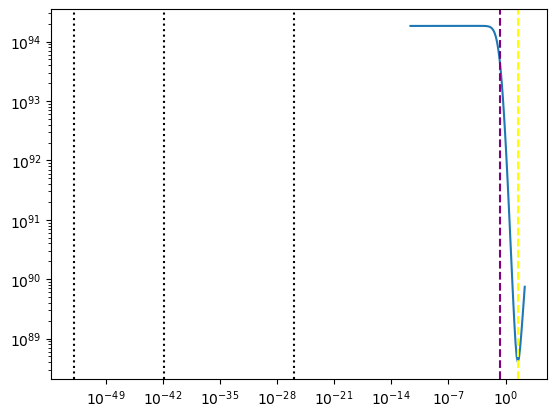

1.2661112352460809e-26
1.2661049688837743e-42
1.2661049688837736e-53


[None, None, None]

In [22]:
k_crit_Mpc = 3e1 
meter_to_Mpc = 3.24078e-23

plt.plot(k_check / s, Pz_check)
plt.xscale('log')
plt.yscale('log')
plt.axvline(x = kzz/s, color='purple', linestyle='--')
plt.axvline(x = k_crit_Mpc, color='yellow', linestyle='--')
[plt.axvline(x = k * meter_to_Mpc, color='black', linestyle=':') for k in k_values ]
plt.show()

[print( k * meter_to_Mpc) for k in k_values]

In [ ]:
Pz_list = []
meter_to_Mpc = 3.24078e-23
# precision parameters
p1 = 1.0e-4
p2 = 0.0
print(k_values)
for j in range(len(k_values)):
    alphaJ = alpha_calc(a_solutions[j])
    k_RH = k_values[j] * (meter_to_Mpc) * s
    print('kJ = '+ str(k_RH) , 'alpha = ' + str(alphaJ) )
    k_fiducial_interval = [k*(10**n) for n in [0,1,2,3,4,5] ]
    t_prim = -250
    zeta1 = tf.mode_1(k_RH,twofluid, p1, p2, t_prim )
    PzkJ = 0
    #PzkJ = spec(twofluid, k_fiducial_interval, tf = alphaJ)[0]
    Pz_list.append(PzkJ)
    

print(Pz_list)

### Compute and plot the power spectra

In [ ]:
PZ_list = []
kJ = k_values_hubble[0]
n = 6


log_left = 1.0e-15
log_right = kJ
kJ_int = np.geomspace(log_left, log_right, n)
Pzt = spec(twofluid, np.geomspace(1.0e2, 1.0e5), tf = alpha_calc(3.8735524810454645e15)  )
# log_left = 18
# log_right = -15
# log_points = np.linspace(log_left, log_right, n - 1)
# kJ_candidates = 10**log_points
# kJ_int = np.sort(np.append(kJ_candidates, kJ))
# kJ_index = np.argmin(np.abs(kJ_int - kJ))
print(kJ_int)
# kJ_int = np.array([10**(j/10) * kJ for j in range(n)])
a_interval = [3.8735524810454645e+21, 3.8735524810454645e+15, 3.8735524810454645e+12, 3.8735524810454645e+2 ]
for a_ in a_interval[1:]:
    print(a_)
    print(alpha_calc(a_))
#     Pz = spec(twofluid, kJ_int, tf = alpha_calc(a_))
#     print(Pz[-1])
#     plt.plot(a_, Pz[-1] * f1**2)
# PzJ_list = Pz / Pz[0]
# PzJ_i = PzJ_list * 1.5e-124 * (1.0 - Omegars) / Omegars  * twofluid.props.xb**2 / w_table**(5/2)
# print(f1**2)


#### Compute Beta function

In [ ]:
print(aform_table, a_solutions)

In [ ]:



betas_table1, pz, arg_list, beta_list2 = compute_beta_k_xuan(k_values_hubble, zetac_table, Omegars, 1.0e-5, 1.0e-24, aform_table)


In [ ]:
print(f"Betas Integral: {betas_table1} \n, Pz: {pz}\n, arg_list: {arg_list}\n, Beta erfc: {beta_list2}")

In [ ]:
import scipy.constants as ct
s = twofluid.RH_Mpc()                             # converts from Hubble radius to Mpc⁻¹ using the implemented Rh_Mpc NumCosmo method
Pl = ct.physical_constants['Planck length'][0]
p = ct.parsec
ly = ct.light_year
#f = ( Pl / (p*s * (10*6)) )*2
f1 = ( Pl / (p*s * (10**6)) )
f2 = ( Pl * (p*s * (10**6)) )



plt.plot(kJ, np.array(aot) * f1**2)

plt.xscale('log')
plt.yscale('log')
plt.axvline(kzz, color='black', linestyle='--')
plt.plot(kJ, pz * f1**2)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
%%time
k_interval = np.geomspace(1e-2 * kzz, 10 * k_trans, 100)
beta_range = beta_k(k_interval)

In [ ]:
plt.plot(k_interval, beta_range)
plt.xscale('log')
plt.yscale('log')
plt.axvline(kzz, color='purple', linestyle='--')
plt.axvline(k_trans, color='yellow', linestyle='--')
plt.show()

In [ ]:
w_interval = np.logspace(-4,-6,100)
plt.plot( w_interval, mass_rj(w = w_interval, a = 1, Omegaw = 1 - 1e-5, Omegars = 1e-5) )
plt.xscale('log')
plt.yscale('log')
plt.show()


# $\infty.$ Chaos

In [ ]:
%%time
from numba import njit
max_alpha_c = -1
k_interval = np.geomspace(1e-8 , kzz, 20)
mode1 = []
mode2 = []
# precision parameters
p1 = 1.0e-4
p2 = 0.0

for k in k_interval:
  mode1.append(tf.mode_1(k,twofluid, p1, p2, max_alpha_c ))
  mode2.append(tf.mode_2(k,twofluid, p1, p2, max_alpha_c ))

In [ ]:
@njit
def compute_indices(mode1_t, mode2_t, alphaC):
    jB_list1 = []
    jC_list1 = []
    jB_list2 = []
    jC_list2 = []

    for k in range(len(mode1_t)):
        # xB1
        jB1 = np.argmin(np.abs(mode1_t[k]))
        jB_list1.append(jB1)

        # xB2
        jB2 = np.argmin(np.abs(mode2_t[k]))
        jB_list2.append(jB2)

        # xC1
        jC1 = np.argmin(np.abs(mode1_t[k] - alphaC))
        jC_list1.append(jC1)

        # xC2
        jC2 = np.argmin(np.abs(mode2_t[k] - alphaC))
        jC_list2.append(jC2)

    return jB_list1, jC_list1, jB_list2, jC_list2

In [ ]:
# Prepare lists of arrays for Numba (mode1_t and mode2_t)
mode1_t = [mode.t for mode in mode1]
mode2_t = [mode.t for mode in mode2]

In [ ]:
@njit
def compute_P(k_interval, delta_rho1R, delta_rho2R, delta_rho1I, delta_rho2I,
              mode1_ps_r, mode1_ps_im, mode2_ps_r, mode2_ps_im,
              jB_list1, jB_list2, jC_list1, jC_list2, f1):

    Pdelta = []
    PdeltaB = []
    PdeltaC = []
    PS = []
    PSB = []
    PSC = []

    twopi2_inv = 1.0 / (2 * (np.pi**2))

    for k in range(len(k_interval)):
        k3 = k_interval[k] ** 3
        f1_sq_k3 = (f1**2) * k3

        # Last indices for delta and ps
        d1R = delta_rho1R[k][-1]
        d2R = delta_rho2R[k][-1]
        d1I = delta_rho1I[k][-1]
        d2I = delta_rho2I[k][-1]

        ps1R = mode1_ps_r[k][-1]
        ps1I = mode1_ps_im[k][-1]
        ps2R = mode2_ps_r[k][-1]
        ps2I = mode2_ps_im[k][-1]

        # Pdelta and PS
        Pdelta_val = f1_sq_k3 * (d1R**2 + d2R**2 + d1I**2 + d2I**2) * twopi2_inv
        PS_val = f1_sq_k3 * (ps1R**2 + ps1I**2 + ps2R**2 + ps2I**2) * twopi2_inv

        Pdelta.append(Pdelta_val)
        PS.append(PS_val)

        # Indices https://meet.google.com/uvn-yvhp-obmfor B and C points
        jB1 = jB_list1[k]
        jB2 = jB_list2[k]
        jC1 = jC_list1[k]
        jC2 = jC_list2[k]

        # PdeltaB and PSB
        d1R_B = delta_rho1R[k][jB1]
        d2R_B = delta_rho2R[k][jB2]
        d1I_B = delta_rho1I[k][jB1]
        d2I_B = delta_rho2I[k][jB2]

        ps1R_B = mode1_ps_r[k][jB1]
        ps1I_B = mode1_ps_im[k][jB1]
        ps2R_B = mode2_ps_r[k][jB2]
        ps2I_B = mode2_ps_im[k][jB2]

        PdeltaB_val = f1_sq_k3 * (d1R_B**2 + d2R_B**2 + d1I_B**2 + d2I_B**2) * twopi2_inv
        PSB_val = f1_sq_k3 * (ps1R_B**2 + ps1I_B**2 + ps2R_B**2 + ps2I_B**2) * twopi2_inv

        PdeltaB.append(PdeltaB_val)
        PSB.append(PSB_val)

        # PdeltaC and PSC
        d1R_C = delta_rho1R[k][jC1]
        d2R_C = delta_rho2R[k][jC2]
        d1I_C = delta_rho1I[k][jC1]
        d2I_C = delta_rho2I[k][jC2]

        ps1R_C = mode1_ps_r[k][jC1]
        ps1I_C = mode1_ps_im[k][jC1]
        ps2R_C = mode2_ps_r[k][jC2]
        ps2I_C = mode2_ps_im[k][jC2]

        PdeltaC_val = f1_sq_k3 * (d1R_C**2 + d2R_C**2 + d1I_C**2 + d2I_C**2) * twopi2_inv
        PSC_val = f1_sq_k3 * (ps1R_C**2 + ps1I_C**2 + ps2R_C**2 + ps2I_C**2) * twopi2_inv

        PdeltaC.append(PdeltaC_val)
        PSC.append(PSC_val)

    return Pdelta, PdeltaB, PdeltaC, PS, PSB, PSC


# Prepare arrays for Numba
mode1_ps_r = [mode.ps_r() for mode in mode1]
mode1_ps_im = [mode.ps_im() for mode in mode1]
mode2_ps_r = [mode.ps_r() for mode in mode2]
mode2_ps_im = [mode.ps_im() for mode in mode2]

In [ ]:
import scipy.constants as ct

s = twofluid.RH_Mpc()                             # converts from Hubble radius to Mpc⁻¹ using the implemented Rh_Mpc NumCosmo method
from scipy import constants as ct
Pl = ct.physical_constants['Planck length'][0]
p = ct.parsec
ly = ct.light_year
f1 = ( Pl / (p*s * (10**6)) ) * np.sqrt( 8 * np.pi / 3 )
p = ct.parsec
f1 = ( Pl / (p*s * (10**6)) ) * np.sqrt( 8 * np.pi / 3 )
σ = 3 / (8 * np.pi * ct.G * ( (p*s*(1e6))**2 ) )


Ωr = 1.41e-7
Ωm = 1 - Ωr
xB_value = 1/aB
w = 0

In [ ]:
def E(alpha_int, aB = aB):
  E_list = []
  for alpha in alpha_int:
    x = 1/a(alpha,aB)
    xB = 1/aB
    dust = Ωr * ( (x**4) - ( (x**6/xB**(2)) ) )
    rad = Ωm * ( (x**(3*(1+w))) - ( (x**6/xB**(3*(1-w))) ) )

    # bounce
    if alpha == 0:
      return 0
    # contraction
    if alpha < 0:
      #value = -complex(np.emath.sqrt(dust + rad))
      value = -(np.sqrt(dust + rad))
    # expansion
    else:
      #value = complex(np.emath.sqrt(dust + rad))
      value = (np.sqrt(dust + rad))
    E_list.append(value)

  return np.array(E_list)

def omegaT(x):
  return (4/3) * Ωr * (x**4) + (1+w) * Ωm * (x**(3*(1+w)))

In [ ]:
delta_rho1R = ([  3 * mode1[j].zeta_r() - E(mode1[j].t,aB = aB) * (a(mode1[j].t, aB = aB)**(-3)) * ( mode1[j].pz_r()*σ ) / (omegaT(1/a(mode1[j].t, aB = aB)) * (1+w))  for j in range( len (k_interval ) ) ])
delta_rho2R = ([  3 * mode2[j].zeta_r() - E(mode2[j].t, aB = aB) * (a(mode2[j].t, aB = aB)**(-3)) * ( mode2[j].pz_r()*σ ) / (omegaT(1/a(mode2[j].t, aB = aB))  * (1+w))  for j in range( len (k_interval ) ) ])

delta_rho1I = ([  3 * mode1[j].zeta_im() - E(mode1[j].t,aB = aB) * (a(mode1[j].t, aB = aB)**(-3)) * ( mode1[j].pz_im()*σ ) / (omegaT(1/a(mode1[j].t, aB = aB))  * (1+w))  for j in range( len (k_interval ) ) ])
delta_rho2I = ([  3 * mode2[j].zeta_im() - E(mode2[j].t,aB = aB) * (a(mode2[j].t, aB = aB)**(-3)) * ( mode2[j].pz_im()*σ ) / (omegaT(1/a(mode2[j].t, aB = aB))  * (1+w))  for j in range( len (k_interval ) ) ])

In [ ]:
alphaJ = -50
jB_list1, jC_list1, jB_list2, jC_list2 = compute_indices(mode1_t, mode2_t, alphaJ)

Pdelta, PdeltaB, PdeltaC, PS, PSB, PSC = compute_P(
    k_interval,
    delta_rho1R, delta_rho2R,
    delta_rho1I, delta_rho2I,
    mode1_ps_r, mode1_ps_im,
    mode2_ps_r, mode2_ps_im,
    jB_list1, jB_list2,
    jC_list1, jC_list2,
    f1
)


In [ ]:
k_list = [0, len(k_interval)//2 , -1]

for k in k_list:
  plt.plot( mode1[k].t, f1**2 * ( (delta_rho1R[k])**2 + (delta_rho1I[k])**2 ), label=r'$\delta_{\rho1}, k = $ '  +f"{k_interval[k]:.1e}", linestyle='--' )
  plt.plot( mode2[k].t, f1**2 * ( (delta_rho2R[k])**2 + (delta_rho2I[k])**2 ), label=r'$\delta_{\rho2}, k = $ '  +f"{k_interval[k]:.1e}" )

#plt.xscale('log')
plt.axvline(x = 0, color='black', linestyle=':')
plt.axvline(x = alphaJ, color='grey', linestyle=':')
plt.axhline(y = 1, color='blue', linestyle=':')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1,1), fontsize=12)
plt.plot()

In [ ]:
plt.plot(k_interval / s, PdeltaB, label=r'${\cal P}_{\delta^{\psi}_{\rho}}(k)$', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
def calculate_Pdelta(k_interval, alphaJ , model=twofluid, f1 = f1):
    mode1 = []
    mode2 = []
    if type(k_interval) == 'numpy.float64':
      k = k_interval
      mode1.append(tf.mode_1(k,twofluid, p1, p2, max_alpha_c ))
      mode2.append(tf.mode_2(k,twofluid, p1, p2, max_alpha_c ))
    if len(k_interval) == 1:
      k = k_interval[0]
      mode1.append(tf.mode_1(k,twofluid, p1, p2, max_alpha_c ))
      mode2.append(tf.mode_2(k,twofluid, p1, p2, max_alpha_c ))
    else:
      for k in k_interval:
        mode1.append(tf.mode_1(k,twofluid, p1, p2, max_alpha_c ))
        mode2.append(tf.mode_2(k,twofluid, p1, p2, max_alpha_c ))

    delta_rho1R = [3 * mode1[j].zeta_r() - E(mode1[j].t, aB=aB) * (a(mode1[j].t, aB=aB)**(-3)) * (mode1[j].pz_r()*σ) / (omegaT(1/a(mode1[j].t, aB=aB)) * (1+w)) for j in range(len(k_interval))]
    delta_rho2R = [3 * mode2[j].zeta_r() - E(mode2[j].t, aB=aB) * (a(mode2[j].t, aB=aB)**(-3)) * (mode2[j].pz_r()*σ) / (omegaT(1/a(mode2[j].t, aB=aB)) * (1+w)) for j in range(len(k_interval))]

    delta_rho1I = [3 * mode1[j].zeta_im() - E(mode1[j].t, aB=aB) * (a(mode1[j].t, aB=aB)**(-3)) * (mode1[j].pz_im()*σ) / (omegaT(1/a(mode1[j].t, aB=aB)) * (1+w)) for j in range(len(k_interval))]
    delta_rho2I = [3 * mode2[j].zeta_im() - E(mode2[j].t, aB=aB) * (a(mode2[j].t, aB=aB)**(-3)) * (mode2[j].pz_im()*σ) / (omegaT(1/a(mode2[j].t, aB=aB)) * (1+w)) for j in range(len(k_interval))]

    # Prepare lists of arrays for Numba (mode1_t and mode2_t)
    mode1_t = [mode.t for mode in mode1]
    mode2_t = [mode.t for mode in mode2]

    jB_list1, jC_list1, jB_list2, jC_list2 = compute_indices(mode1_t, mode2_t, alphaJ)

    # Prepare arrays for Numba
    mode1_ps_r = [mode.ps_r() for mode in mode1]
    mode1_ps_im = [mode.ps_im() for mode in mode1]
    mode2_ps_r = [mode.ps_r() for mode in mode2]
    mode2_ps_im = [mode.ps_im() for mode in mode2]

    Pdelta, PdeltaB, PdeltaC, PS, PSB, PSC = compute_P(
        k_interval,
        delta_rho1R, delta_rho2R,
        delta_rho1I, delta_rho2I,
        mode1_ps_r, mode1_ps_im,
        mode2_ps_r, mode2_ps_im,
        jB_list1, jB_list2,
        jC_list1, jC_list2,
        f1
    )

    # return Pdelta, PdeltaB, PdeltaC, PS, PSB, PSC  # Returning all calculated power spectra
    return Pdelta

In [ ]:
%%timeit
k = [kc]
calculate_Pdelta(k, alphaJ)

In [ ]:
f1 = 1
k_interval = np.geomspace(1e-8,100 * kc, 100)
Pd = calculate_Pdelta(k_interval, alphaJ)

In [ ]:
plt.plot(k_interval, Pd)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
# # C. Power Spectra commands

# def spec_params(Omegars, w, xb,  E0, k_interval, max_alpha = -1):
#     model = Nc.HICosmoQGRW()
#     model.props.w = w
#     model.props.Omegar = E0 * Omegars
#     model.props.Omegaw = E0 * (1.0 - Omegars)
#     model.props.xb = xb

#     pert = Nc.HIPertTwoFluids.new()
#     pert.props.reltol = 1.0e-9

#     k0 = k_interval[0]
#     kf = k_interval[-1]
#     L = len(k_interval)

#     #spec1 = pert.compute_zeta_spectrum(model, 1, -model.abs_alpha(1.0e-14), 0.0, k0, kf, L)
#     #spec2 = pert.compute_zeta_spectrum(model, 2, -model.abs_alpha(1.0e-14), 0.0, k0, kf, L)

#     spec1 = pert.compute_zeta_spectrum(model, 1, -model.abs_alpha(1.0e-14), max_alpha, k0, kf, L)
#     spec2 = pert.compute_zeta_spectrum(model, 2, -model.abs_alpha(1.0e-14), max_alpha, k0, kf, L)

#     return spec1, spec2


# def spec_Pz_params(Omegars, w, xb,  E0, k_interval, max_alpha = -1):
#     model = Nc.HICosmoQGRW()
#     model.props.w = w
#     model.props.Omegar = E0 * Omegars
#     model.props.Omegaw = E0 * (1.0 - Omegars)
#     model.props.xb = xb

#     pert = Nc.HIPertTwoFluids.new()
#     pert.props.reltol = 1.0e-9

#     k0 = k_interval[0]
#     kf = k_interval[-1]
#     L = len(k_interval)

#     spec1 = pert.compute_Pzeta_spectrum(model, 1, -model.abs_alpha(1.0e-14), max_alpha, k0, kf, L)
#     spec2 = pert.compute_Pzeta_spectrum(model, 2, -model.abs_alpha(1.0e-14), max_alpha, k0, kf, L)

#     return spec1, spec2


# def spec(model, k_interval, max_alpha = -1, E0 = 1):
#   w = model.props.w
#   Omegars = model.props.Omegar
#   Omegarm  = E0 - model.props.Omegaw
#   xb = model.props.xb
#   spec1, spec2 = spec_params(Omegars, w, xb,  E0, k_interval, max_alpha)

#   Pk_a1 = np.exp( np.array(spec1.peek_yv().dup_array()) )
#   Pk_a2 = np.exp( np.array(spec2.peek_yv().dup_array()) )

#   return ( Pk_a1 + Pk_a2 ) / (2 * np.pi**2)


# def spec_Pz(model, k_interval, max_alpha = -1, E0 = 1):
#   w = model.props.w
#   Omegars = model.props.Omegar
#   Omegarm  = E0 - model.props.Omegaw
#   xb = model.props.xb
#   spec1, spec2 = spec_Pz_params(Omegars, w, xb,  E0, k_interval, max_alpha)

#   Pk_a1 = np.exp( np.array(spec1.peek_yv().dup_array()) )
#   Pk_a2 = np.exp( np.array(spec2.peek_yv().dup_array()) )

#   return ( Pk_a1 + Pk_a2 ) / (2 * np.pi**2)


In [ ]:
k_interval = np.geomspace(k_interval[0], k_interval[-1]/100, 6)

In [ ]:
# %%time

# # calculates the power spectra
# alphaJ = 40
# Pz = spec(twofluid, k_interval, alphaJ)        # calculates the adiabatic power spectrum Pζ(k)
# P_pz = spec_Pz(twofluid, k_interval, alphaJ)   # calculates the adiabatic momentum power spectrum PΠζ(k)
# Pdelta_rho2R = ([  3 * mode2[j].zeta_r() - E(alphaJ, aB = aB) * (a(alphaJ, aB = aB)**(-3)) * ( mode2[j].pz_r()*σ ) / (omegaT(1/a(alphaJ, aB = aB))  * (1+w))  for j in range( len (k_interval ) ) ])

In [ ]:
delta_c = 1
def beta_k(k_interval):
  beta_list = []
  for k in k_interval:
    aJk = compute_jeans_a(k, a_interval, Omega_m = 1 - v, Omega_r = v, w=1e-3)
    kJ = compute_kj(aJk, Omega_r = v, Omega_m = 1 - v, w=1e-3)
    n = 100
    kJ_int = np.array([10**(j/10) * kJ for j in range(n)])
    Pdelta = np.array(calculate_Pdelta([kJ], alphaJ))

    #print(type(Pdelta))
    #print(PzJ, kJ, aJk)
    def gauss_pdeltaK(delta):
      return (2/(np.sqrt( 2 * np.pi * Pdelta ))) * np.exp(  -delta**2 / (2*Pdelta) )

    beta_list.append( sc.integrate.quad(gauss_pdeltaK, delta_c, np.inf)[0] )

  return beta_list

In [ ]:
%%time
k_interval = np.geomspace(1e-8, kc * 10, 100)
beta_range = beta_k(k_interval)

In [ ]:
plt.plot(k_interval, beta_range)
plt.xscale('log')
plt.yscale('log')
plt.axvline(kzz, color='purple', linestyle='--')
plt.axvline(k_trans, color='black', linestyle='--')
plt.axvline(kc, color='yellow', linestyle='--')
plt.show()

In [ ]:
import numpy as np
from scipy.optimize import brentq
import scipy as sc
Omegaw = twofluid.props.Omegaw
Omegars = twofluid.props.Omegar

def mass_rj(a, Omegaw, Omegars, w):
    numerator = 16 * np.sqrt(2) * (np.pi ** 2) * (w ** (3/2)) * (Omegaw / a**3 + Omegars / a**4)
    term1 = 6 * Omegaw / a**3 - (1 - 48 * w) * Omegars / a**4
    term2 = np.sqrt(term1**2 + 192 * w * Omegars**2 / a**8)
    denominator = (term1 + term2)**(3/2)
    return 1e25 * numerator / denominator

def find_a_for_mass(target_mass, Omegaw, Omegars, w):
    a_vals = np.logspace(-16, 4, 10000)
    mass_vals = [mass_rj(a, Omegaw, Omegars, w) for a in a_vals]

    for i in range(len(a_vals) - 1):
        m1, m2 = mass_vals[i], mass_vals[i + 1]
        if (m1 - target_mass) * (m2 - target_mass) < 0:
            return brentq(lambda a: mass_rj(a, Omegaw, Omegars, w) - target_mass,
                          a_vals[i], a_vals[i + 1])
    return None

target_masses = [1e-2, 1e2, 1e14]
k_values = []
w_list = [1.0e-4, 1.0e-5, 1.0e-6]
zeta_c_lists = [[1.642e-4, 1.673e-4,  1.675e-4], [1.6938e-5, 1.6414e-5, 1.6938e-5], [1.64767e-6, 1.66335e-6, 1.64778e-6] ]
for l,wl in enumerate(w_list):
    print(f'aqui{wl}')
    for i,mass in enumerate(target_masses):
        a_root = find_a_for_mass(mass, Omegaw, Omegars, wl)
        if a_root:
            k = 1 / a_root
            k_values.append(k)
            print(f"Target Mass = {mass:.1e}, a = {a_root:.5e}, k ∝ {k:.5e}")
        else:
            print(f"Target Mass = {mass:.1e} not reachable in given a-range.")
        kJ = compute_kj(a_root, Omega_r = v, Omega_m = 1 - v, w=1e-3)
        for j in range(len(k_range)):
          if np.abs(k_range[j]-kJ) == np.min(np.abs(k_range-kJ)):
            PzJ = Pz[j]
        print(f'Spec {PzJ}')
        print(f'zetac {zeta_c_lists[l][i]}')
        beta = sc.integrate.quad(gauss_pz, zeta_c_lists[l][i], np.inf, args=(PzJ,))[0]
        plt.scatter(mass, beta)
        plt.yscale('log')
        plt.xscale('log')
        print(f'Beta {beta}')
    plt.xlabel('mass in solar mass')
    plt.show()

In [ ]:
import numpy as np
from scipy.optimize import brentq
import scipy as sc
import matplotlib.pyplot as plt  # Added missing import

Omegaw = twofluid.props.Omegaw
Omegars = twofluid.props.Omegar

def mass_rj(a, Omegaw, Omegars, w):
    numerator = 16 * np.sqrt(2) * (np.pi ** 2) * (w ** (3/2)) * (Omegaw / a**3 + Omegars / a**4)
    term1 = 6 * Omegaw / a**3 - (1 - 48 * w) * Omegars / a**4
    term2 = np.sqrt(term1**2 + 192 * w * Omegars**2 / a**8)
    denominator = (term1 + term2)**(3/2)
    return 1e25 * numerator / denominator

def find_a_for_mass(target_mass, Omegaw, Omegars, w):
    a_vals = np.logspace(-16, 4, int(1e4))
    mass_vals = [mass_rj(a, Omegaw, Omegars, w) for a in a_vals]

    for i in range(len(a_vals) - 1):
        m1, m2 = mass_vals[i], mass_vals[i + 1]
        if (m1 - target_mass) * (m2 - target_mass) < 0:
            return brentq(lambda a: mass_rj(a, Omegaw, Omegars, w) - target_mass,
                          a_vals[i], a_vals[i + 1])
    return None

target_masses = [1e-2, 1e2, 1e14]
k_values = []
w_list = [1.0e-4, 1.0e-5, 1.0e-40]
zeta_c_lists = [[1.642e-4, 1.673e-4, 1.675e-4], [1.6938e-5, 1.6414e-5, 1.6938e-5], [1.64767e-6, 1.66335e-6, 1.64778e-6]]

# Assuming these functions/variables are defined elsewhere as per your note
# compute_kj, k_range, Pz, gauss_pz, v must be defined

for l, wl in enumerate(w_list):
    print(f'aqui {wl}')
    for i, mass in enumerate(target_masses):
        a_root = find_a_for_mass(mass, Omegaw, Omegars, wl)
        if a_root:
            k = 1 / a_root
            k_values.append(k)
            print(f"Target Mass = {mass:.1e}, a = {a_root:.10e}, k ∝ {k:.5e}")
        else:
            print(f"Target Mass = {mass:.1e} not reachable in given a-range.")

        kJ = compute_kj(a_root, Omega_r=v, Omega_m=1-v, w=wl)  # Assuming v is defined
        for j in range(len(k_range)):  # Assuming k_range is defined
            if np.abs(k_range[j]-kJ) == np.min(np.abs(k_range-kJ)):
                PzJ = Pz[j]  # Assuming Pz is defined
        print(f'Spec {PzJ}')
        print(f'zetac {zeta_c_lists[l][i]}')

        beta = sc.integrate.quad(gauss_pz, zeta_c_lists[l][i], np.inf, args=(PzJ,))[0]  # Assuming gauss_pz is defined
        plt.scatter(mass, beta)
        plt.yscale('log')
        plt.xscale('log')
        print(f'Beta {beta}')
        print('_______________________________________________')
    plt.xlabel('mass in solar mass')
    #plt.show()
plt.show()

In [ ]:
w_interval = np.logspace(-4,-6,100)
plt.plot( w_interval, mass_rj(w = w_interval, a = 1, Omegaw = 1 - 1e-5, Omegars = 1e-5) )
plt.xscale('log')
plt.yscale('log')
plt.show()


In [ ]:
a_vals = np.logspace(-16, 4, 10000)
for w in w_list:
    masses = [mass_rj(a, Omegaw, Omegars, w) for a in a_vals]
    plt.plot(a_vals, masses, label=f'w={w}')
plt.axhline(target_masses[0], linestyle='--', color='k')
plt.axhline(target_masses[1], linestyle='--', color='gray')
plt.axhline(target_masses[2], linestyle='--', color='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("a (scale factor)")
plt.ylabel("mass_rj")
plt.legend()
plt.show()


## Coordinate Modes $\{\zeta_{k}, S_{k} \}$

In this section, we turn to plot and discuss the behavior of the coordinate modes $\{\zeta_{k\ell}, S_{k\ell} \}$ for various values of $k$. Their behavior can be visualized in the next cell, for which we have plotted the time evolution of their real parts:

In [ ]:
twofluid.eom_eval(1,1).cs2

In [ ]:
G = 1e-13

def RJ(model,alpha_list):
  return np.array([  np.sqrt(model.props.Omegaw * a(alpha)**(-3) +(model.props.Omegar) * a(alpha)**(-4)) * np.sqrt( model.eom_eval(alpha,1).cs2/ ( (4 * np.pi * G) * ( model.props.Omegaw * a(alpha)**(-3) + (8 / 3) * (model.props.Omegar) * a(alpha)**(-4) ) ) ) for alpha in alpha_list])

In [ ]:
k_list = np.geomspace(1e8,1e20,20)
[plt.plot( alpha_c, model_list[0].nuz * k , label=r'$\lambda^{-1}_{k}$') for k in k_list]
plt.plot( alpha_c, np.abs(model_list[0].Rh_z), color='black', label=r'$R^{-1}_{H\zeta}$' )
plt.plot( alpha_c, 1/RJ(twofluid,alpha_c), color='red', label=r'$R^{-1}_{J}$' )
#plt.xscale('log')
plt.yscale('log')
#plt.axvline(x = tc, linestyle='--', color='black' )
plt.axvline(x = 0, linestyle='--', color='yellow', label=r'Bounce' )
plt.xlabel(r'$\alpha$')
#plt.legend()
plt.show()

In [ ]:
k_list = np.geomspace(1e-2,1e3,1)
[plt.plot( alpha_c, 1/(model_list[0].nuz * k) , label=r'$\lambda_{k}$') for k in k_list]
plt.plot( alpha_c, 1/np.abs(model_list[0].Rh_z), color='black', label=r'$R_{H\zeta}$' )
plt.plot( alpha_c, RJ(twofluid,alpha_c), color='red', label=r'$R_{J}$' )
#plt.xscale('log')
plt.yscale('log')
#plt.axvline(x = tc, linestyle='--', color='black' )
plt.axvline(x = 0, linestyle='--', color='yellow', label=r'Bounce' )
plt.xlabel(r'$\alpha$')
plt.legend()
plt.show()

In [ ]:
%%time

# figure parameters
r = 2   # number of rows
c = 2   # number of columns

# defines a for loop to plot the coordinate modes {ζkℓ,Skℓ} for each value of k
for j in range(len(k_list)):
  k = k_list[j]  # sets k to be equal to each value of the k_list per iteration

  # prints the respective k interval
  if j==0:
    k_text = r'k << kζζ'
    k_val_text = r'$k = k_{\zeta\zeta}/1000$'
    k_name = 'k_dust'
  if j==1:
    k_text = 'kζζ < k < kc'
    k_val_text = r'$k = \sqrt{k_{\zeta\zeta}k_{c}}$'
    k_name = 'k_trans'
  if j==2:
    print()
    k_text = 'kc << k'
    k_val_text = r'$k = 1000k_{c}$'
    k_name = 'k_rad'
  print(k_text)

  # Defines one r x c figure per value of k
  fig, ax = plt.subplots(r,c, figsize=(14, 10))                                               # sets the size of the figure
  fig.tight_layout()                                                                          # sets the size of each plot within the figure
  fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.5)   # sets the space between each plot

  # Defining the modes
  init1 = mode1_list[j]         # defines a variable associated to the modes of Initial Condition 1 per each value of k
  init2 = mode2_list[j]         # defines a variable associated to the modes of Initial Condition 2 per each value of k
  twofluid_k = model_list[j]    # defines a variable associated to the models per each value of k

  # Plots the Adiabatic Modes
  ax[0,0].plot(a(init1.t)/aB, init1.zeta_r() , label = r'$\zeta_{k1}(\alpha)$', color='red')                         # plots ζk1, the adiabatic mode associated to Initial Condition 1
  ax[0,0].plot(a(init2.t)/aB, init2.zeta_r(), label = r'$\zeta_{k2}(\alpha)$' , color='blue')                        # plots ζk2, the adiabatic mode associated to Initial Condition 2

  # Plots the Entropy Modes
  ax[0,1].plot(a(init1.t)/aB, init1.s_r(), label=r'$S_{k1}(\alpha)$', color='red')                                   # plots Sk1, the entropy mode associated to Initial Condition 1
  ax[0,1].plot(a(init2.t)/aB, init2.s_r(), label=r'$S_{k2}(\alpha)$', color='blue')                                  # plots Sk2, the entropy mode associated to Initial Condition 2

  # Adiabatic Effective Couplings
  ax[1,0].plot(a_c, twofluid_k.nuz**2, label = r'$\nu^{2}_{\zeta}$', color='blue')                    # plots νζ², the frequency squared  of the adiabatic modes
  ax[1,0].plot(a_c, np.abs(twofluid_k.Rh_z), label=r'$|R^{-1}_{H\zeta}|$', color='black')                        # plots R⁻¹_Hζ, the inverse effective adiabatic Hubble radius
  ax[1,0].plot(a_c, np.abs(twofluid_k.aleph_zs) * (k**2), label=r'$\aleph_{\zeta S}$', color='green')     # plots ℵ_ζS, adiabatic-to-entropy sub-Hubble coupling
  ax[1,0].plot(a_c, np.abs(twofluid_k.beth_zs), label=r'$\beth_{\zeta S}$', color='orange')               # plots ℶ_ζS, adiabatic-to-entropy super-Hubble coupling
  #ax[1,0].plot(alpha_c, twofluid_k.wz, label=r'$\omega^{2}_{\zeta}$', color='pink')                          # plots the ωζ, the frequency of the adiabatic Mukhanov-Sasaki variable

  # Entropy Effective Couplings
  ax[1,1].plot(a_c, twofluid_k.nus**2, label = r'$\nu^{2}_{S}$', color='blue')                        # plots the frequency squared νS² of the entropy modes
  ax[1,1].plot(a_c, np.abs( twofluid_k.Rh_s ), label=r'$|R^{-1}_{H S}|$', color='black')                         # plots R⁻¹_HS, the inverse effective adiabatic Hubble radius
  ax[1,1].plot(a_c, np.abs(twofluid_k.aleph_sz) * (k**2), label=r'$\aleph_{S\zeta}$', color='green')      # plots ℵ_Sζ, entropy-to-adiabatic sub-Hubble coupling
  ax[1,1].plot(a_c, np.abs(twofluid_k.beth_sz), label=r'$\beth_{S\zeta}$', color='orange')                # plots ℶ_Sζ, entropy-to-adiabatic super-Hubble coupling
  #ax[1,1].plot(alpha_c, twofluid_k.ws, label=r'$\omega^{2}_{S}$', color='brown')                             # plots the ωS, the frequency of the entropy Mukhanov-Sasaki variable

  ##################################################################################################################################################################################################

  # Legends

  # Titles
  ax[0,0].set_title(r'$\zeta_{k}(\alpha)$' + "$, k =$" + k_val_text )                               # sets the legend of the adiabatic modes plot
  ax[0,1].set_title(r'$S_{k}(\alpha)$' + "$, k =$" + k_val_text )                                   # sets the legend of the entropy modes plot
  ax[1,0].set_title(r'$\nu^{2}_{\zeta}, R^{-1}_{H\zeta}, \aleph_{\zeta S}, \beth_{\zeta S}$')       # sets the legend of the adiabatic effective couplings plot
  ax[1,1].set_title(r'$\nu^{2}_{S}, R^{-1}_{H S}, \aleph_{S\zeta}, \beth_{S\zeta}$')                # sets the legend of the entropy effective couplings plot

  # Sets the y labels
  ax[0,0].set_ylabel(r'$\zeta_{k}(\alpha)$')    # sets a label to the y axis of the norm of adiabatic modes plot for Initial Condition 1
  ax[0,1].set_ylabel(r'$S_{k}(\alpha)$')        # sets a label to the y axis of the norm of entropy modes plot for Initial Condition 1


  # creates loops to iterate over each graph
  for i in range(r):                                      # iterates over each row
    for j in range(c):                                    # iterates over each column

      # Characteristic Transition Times
      ax[i,j].axvline(x = az/aB, color='olive', linestyle=':', label=r'$a_{\zeta}$')                  # plots aζ, the characteristic time instant for which the speed of sound of the adiabatic mode starts to vary
      ax[i,j].axvline(x = aS/aB, color='brown', linestyle=':', label=r'$a_{S}$')                      # plots aS, the characteristic time instant for which the speed of sound of the entropy mode starts to vary
      ax[i,j].axvline(x = ac/aB, color='yellow', linestyle=':', label=r'$a_{c}$')                     # plots ac, the transition time instant

      # Horizon Crossing Times of each mode
      ax[i,j].axvline(x = a(twofluid_k.cross_z(k))/aB, color='purple', linestyle='--', label=r'$a^{\zeta}_{ cross }$ = ' + f"{a(twofluid_k.cross_z(k)):.2e}" ) # plots the time for which the adiabatic mode frequency coincides with its effective Hubble radius
      ax[i,j].axvline(x = a(twofluid_k.cross_s(k))/aB, color='orange', linestyle='--', label=r'$a^{S}_{ cross }$ = ' + f"{a(twofluid_k.cross_s(k)):.2e}" )     # plots the time for which the entropy mode frequency coincides with its effective Hubble radius
      #ax[i,j].axvline(x = 1, color='black', linestyle=':', label=r'$\alpha = \alpha_{B} = 0$' )                                                            # plots the bouncing time instant


      # Sets the y scales
      ax[i,j].set_xscale('log')                           # sets a x log scale for the plots
      ax[i,j].set_xlim(a_c[0],a_c[-1])                    # sets the x limits
      if i < 1:
        ax[i,j].set_yscale('symlog', linthresh=1e-20)     # sets a log scale that allows negative values for the mode plots
        ax[i,j].legend(fontsize=15)                       # shows the legend and sets the legend font size
      else:
        ax[i,j].set_yscale('log')                         # sets a log scale for the effective couplings plots
        ax[i,j].legend(fontsize=12)                       # shows the legend and sets the legend font size


      # Labels
      ax[i,j].set_xlabel(r'$a/a_{\hbox{B}}$')    # sets a label to x axis as time
      #ax[i,j].legend()                   # prints the legend

  #print('k ~ '+str(f"{k:.2e}"))     # prints the value of k for each mode

  # a separator between each plot
  print('-------------------------------------------------------------------------------------------------------------------------------------------------------------')

###############################################################################################################################

  # shows the figure per each mode
  plt.savefig(f"graphs/"+k_name+".pdf", bbox_inches="tight")       # saves the figure
  plt.show()